In [9]:
from collections import Counter
from itertools import chain

from news_vec.corpus import Corpus

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [3]:
c = Corpus('../data/clf-articles.json/')

2019-01-18 15:14:46,446 | INFO : Reading headlines.
1081790it [00:15, 68173.44it/s]


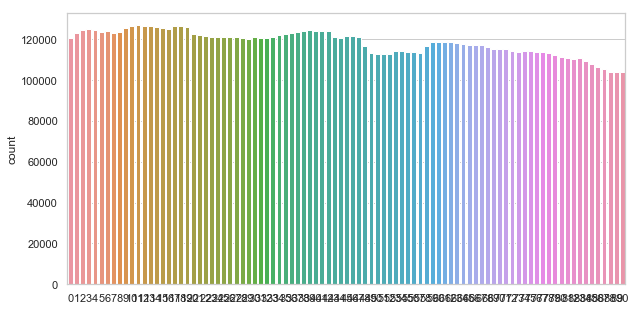

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(list(chain(*c.df.windows)))

In [20]:
c.df['clf_ratio'] = c.df.apply(lambda r: len(r.clf_tokens) / len(r.tokens), 1)

In [27]:
for r in c.df.sort_values('clf_ratio').head(200).itertuples():
    print(' '.join(r.tokens), ' '.join(r.clf_tokens))

Trump warns Puerto Rico : ' We can not keep FEMA , the Military & the First Responders .   .   . forever ! ' the first responders forever
Trump warns Puerto Rico : ' We can not keep FEMA , the Military & the First Responders .   .   . forever ! ' the first responders forever
' I , Donald John Trump .   .   . ' : The 38 most momentous words President Trump said at his inauguration i donald john trump
* * * LIVE AT 10 PM ET * * * Milo University of Washington : ' Cyberbullying Is n't Real ' - Breitbart cyberbullying is nt real
Polling Mixed on Florida Senate - - CBS News YouGov : Scott + 5 , NBC News Marist : Nelson + 4 | Breitbart # nbc news marist
CNN 's Zakaria on Immigration : Trump Seems ' Racist ' - GOP ' Ugly , ' ' Encouraging ' Bigotry ' - Breitbart gop ugly encouraging bigotry
Asia Expert : Bannon ' Today 's Paul Revere ' on China—'The Bannon Express ' Putting ' Communists Giants ' & Globalists in ' Grave Danger ' - Breitbart bannon express putting communists giants
NBC 's Allen

In [24]:
c.df.iloc[374545].clf_tokens

['pathetic', 'disgraceful', 'erratic', 'painful']

In [25]:
c.df.iloc[374545].tokens

['John',
 'McCain',
 'Rips',
 'Trump',
 'Putin',
 'Presser',
 ':',
 "'",
 'Pathetic',
 ',',
 "'",
 "'",
 'Disgraceful',
 ',',
 "'",
 "'",
 'Erratic',
 ',',
 "'",
 "'",
 'Painful',
 "'"]